<a href="https://colab.research.google.com/github/ryannovianno9/Garment-Productivity-Classification/blob/main/Capstone_Project_Ryan_Novianno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.0.2

# Data Collection and Data Understanding

## Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data yang digunakan: https://drive.google.com/drive/folders/13M0Z9Zzz_NJGrYrUD4qWVRxim2f_OTZ8

- date : tanggal
- day : hari
- quarter : kuartal
-  department : nama departemen
-  team_no : Nomor tim yang bertanggung jawab pada proses produksi dan mesin
-  no_of_workers : Jumlah pekerja dari tiap tim
-  no_of_style_change : Jumlah perubahan pada desain pada produk tertentu
-  targeted_productivity : Target produktivitas yang diatur oleh manager untuk tiap tim setiap harinya.
-  smv : Standard Minute Value, banyaknya waktu yang dialokasikan untuk mengerjakan tugas
-  wip : Work in progress. Yaitu jumlah barang atau produk yang belum selesai diproduksi
-  over_time : Banyakan waktu tambahan dari tiap tim dihitung dalam menit
-  incentive : Merepresentasikan insentif (dalam BDT) yang diberikan kepada buruh untuk memotivasi buruh
-  idle_time : Waktu idle yang terjadi karena adanya gangguan pada proses produksi disebabkan oleh
berbagai macam sebab (misalnya kerusakan mesin, bahan baku telat datang, dll)
-  idle_men : Jumlah pekerja yang idle disebabkan adanya interupsi atau gangguan pada proses produksi
-  actual_productivity (variabel target) : % produktivitas buruh. Memiliki rentang nilai 0-1

## Masalah

Bayangkan Anda adalah seorang Data Scientist pada sebuah perusahaan yang
bergerak di industri garmen. Anda diminta oleh CEO perusahaan untuk memprediksi
efektivitas buruh. Karena sebagian besar proses pada pabriknya masih dilakukan
secara manual (tenaga manusia memiliki porsi besar dibandingkan mesin), maka
penting baginya untuk mengetahui seberapa efektif dan efisien kinerja buruhnya
sehingga dia bisa melakukan intervensi tertentu jika efektivitas kinerjanya mulai turun dan memberikan insentif jika kinerjanya baik dan stabil.

## Import Library

In [ ]:
!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

## Data Understanding

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cakap DS/garments_worker_productivity.csv')
df.shape

(1197, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
dict(df.dtypes)

{'date': dtype('O'),
 'quarter': dtype('O'),
 'department': dtype('O'),
 'day': dtype('O'),
 'team': dtype('int64'),
 'targeted_productivity': dtype('float64'),
 'smv': dtype('float64'),
 'wip': dtype('float64'),
 'over_time': dtype('int64'),
 'incentive': dtype('int64'),
 'idle_time': dtype('float64'),
 'idle_men': dtype('int64'),
 'no_of_style_change': dtype('int64'),
 'no_of_workers': dtype('float64'),
 'actual_productivity': dtype('float64')}

In [ ]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [ ]:
df.isna()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1193,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1194,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

date: ['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
quarter: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
department: ['sweing' 'finishing ' 'finishing']
day: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
team: [ 8  1 11 12  6  7  2  3  9 10  5  4]
targeted_productivity: [0.8  0.75 0.7  0.65 0.6  0.35 0.5  0.07 0.4 ]
s

# Data Cleaning

<Axes: >

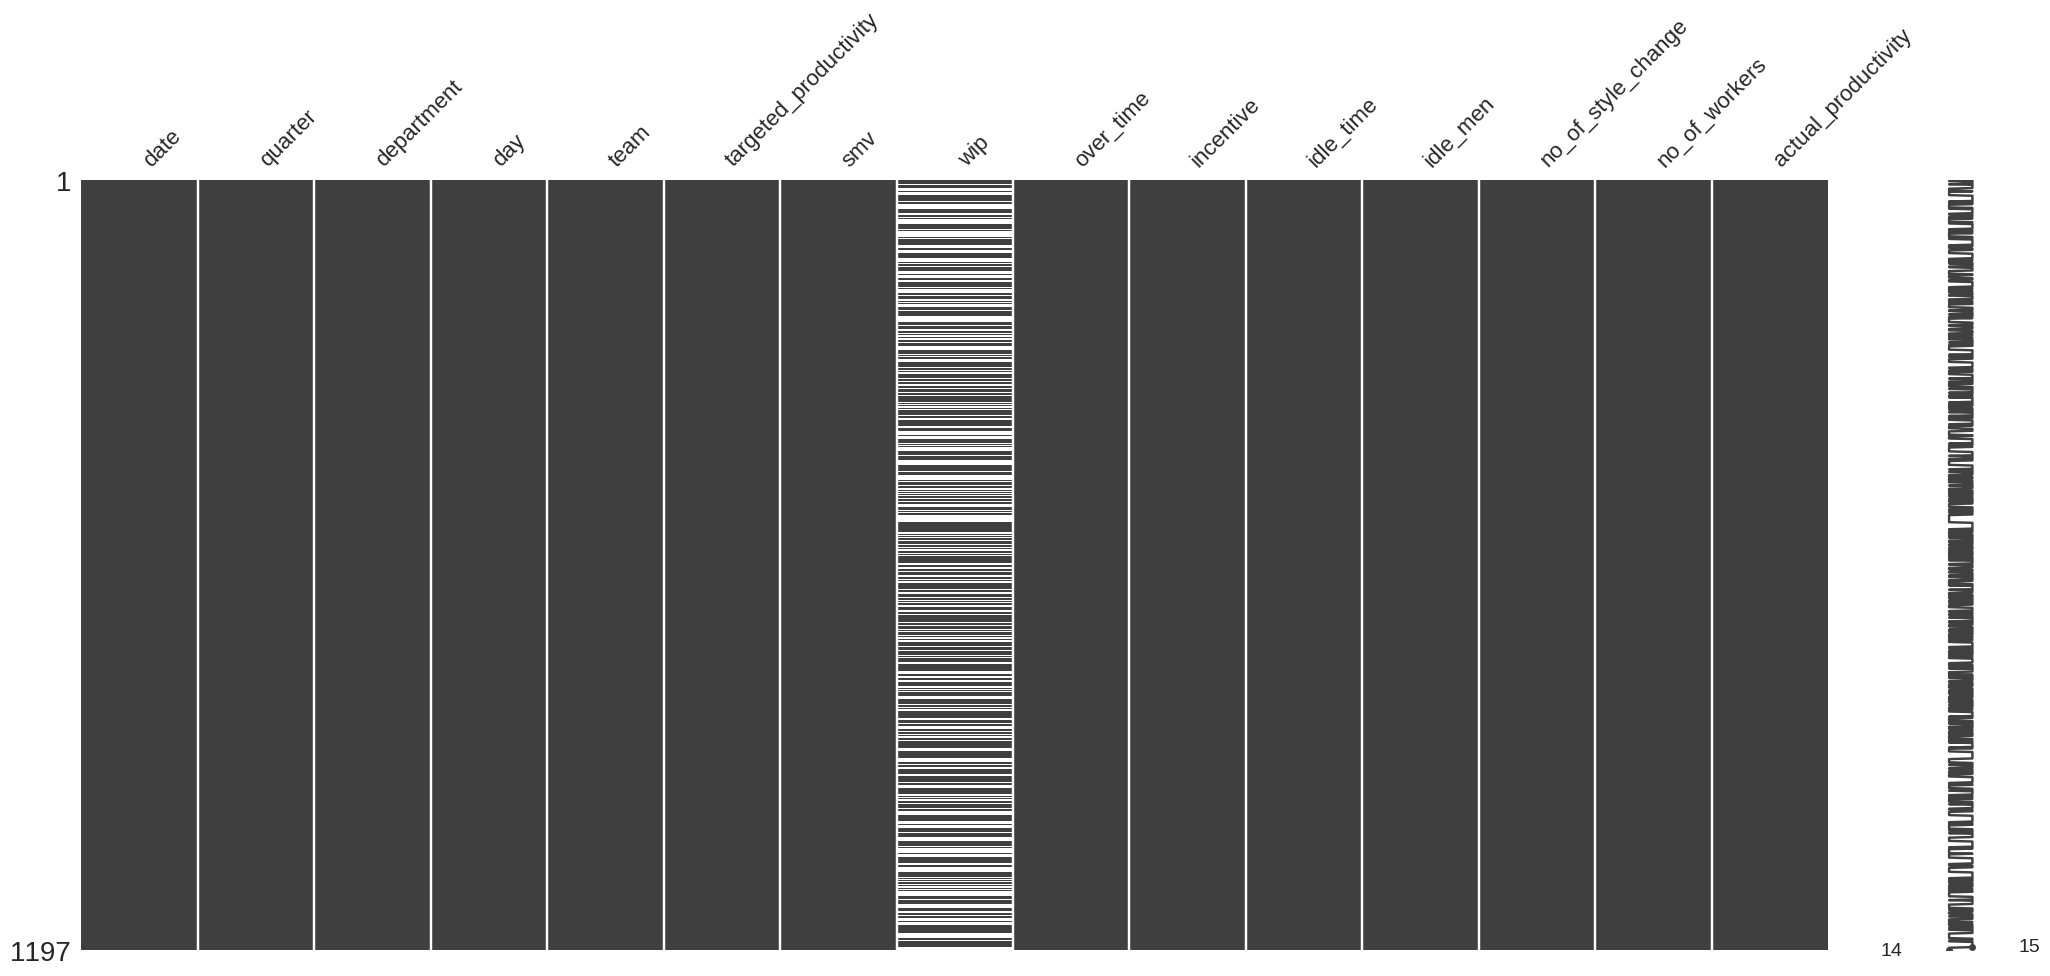

In [ ]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

In [ ]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

,0
date,0.000000
quarter,0.000000
department,0.000000
day,0.000000
team,0.000000
targeted_productivity,0.000000
smv,0.000000
wip,42.272348
over_time,0.000000
incentive,0.000000


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['department'] = df['department'].replace('sweing','sewing')
df['department'] = df['department'].replace('finishing ', 'finishing')

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
num_cols = [i for i in df.columns if df[i].dtypes != 'object' and i not in ['no_of_style_change','date','team']]
cat_cols = [i for i in df.columns if df[i].dtypes == 'object' or i in ['no_of_style_change','team']]

print(num_cols)
print(cat_cols)

['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']
['quarter', 'department', 'day', 'team', 'no_of_style_change']


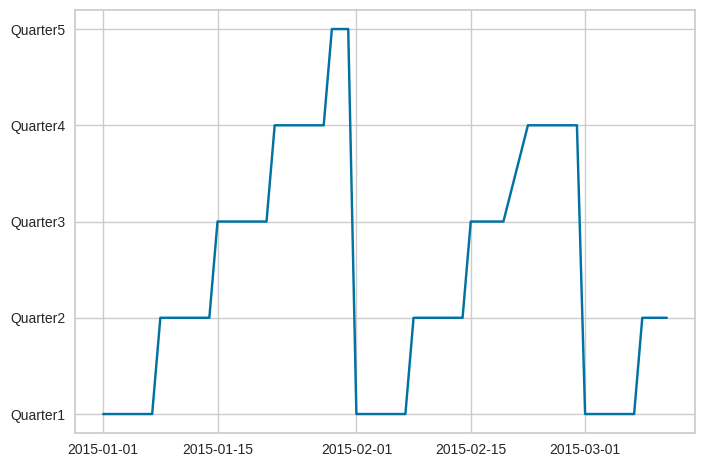

In [ ]:
plt.plot(df['date'], df['quarter'])
plt.show()

In [ ]:
df['quarter'] = df['quarter'].replace('Quarter5','Quarter4')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# EDA

In [ ]:
df.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

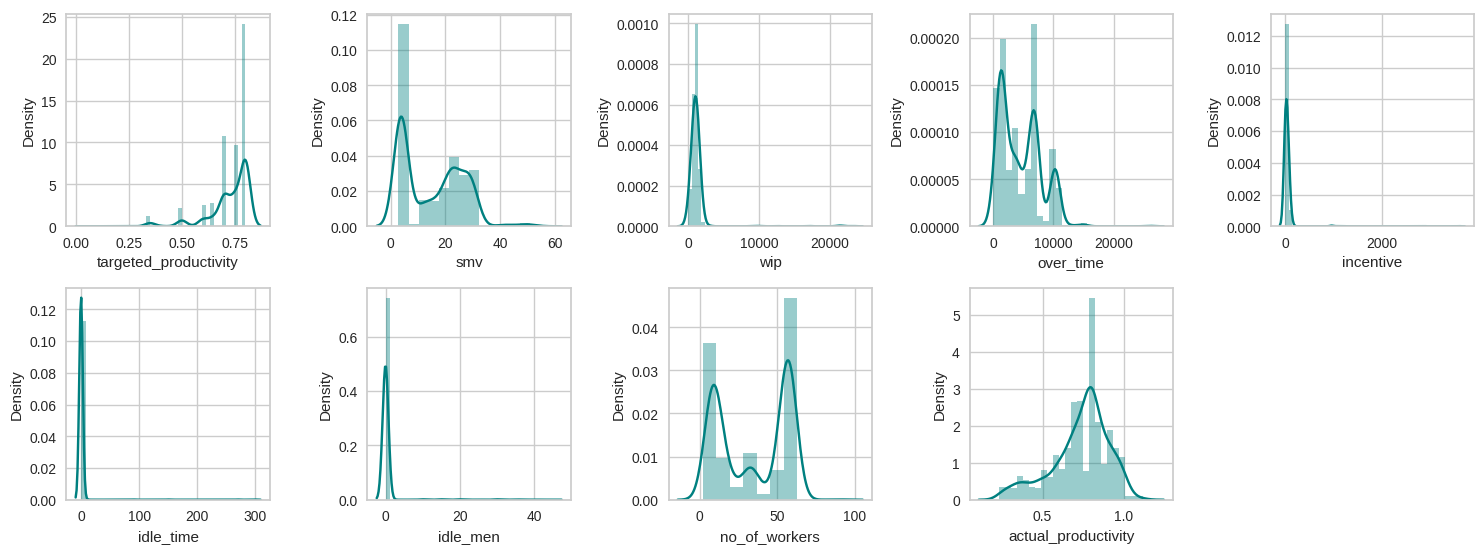

In [ ]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[num_cols[i]], color='teal')
    plt.tight_layout()

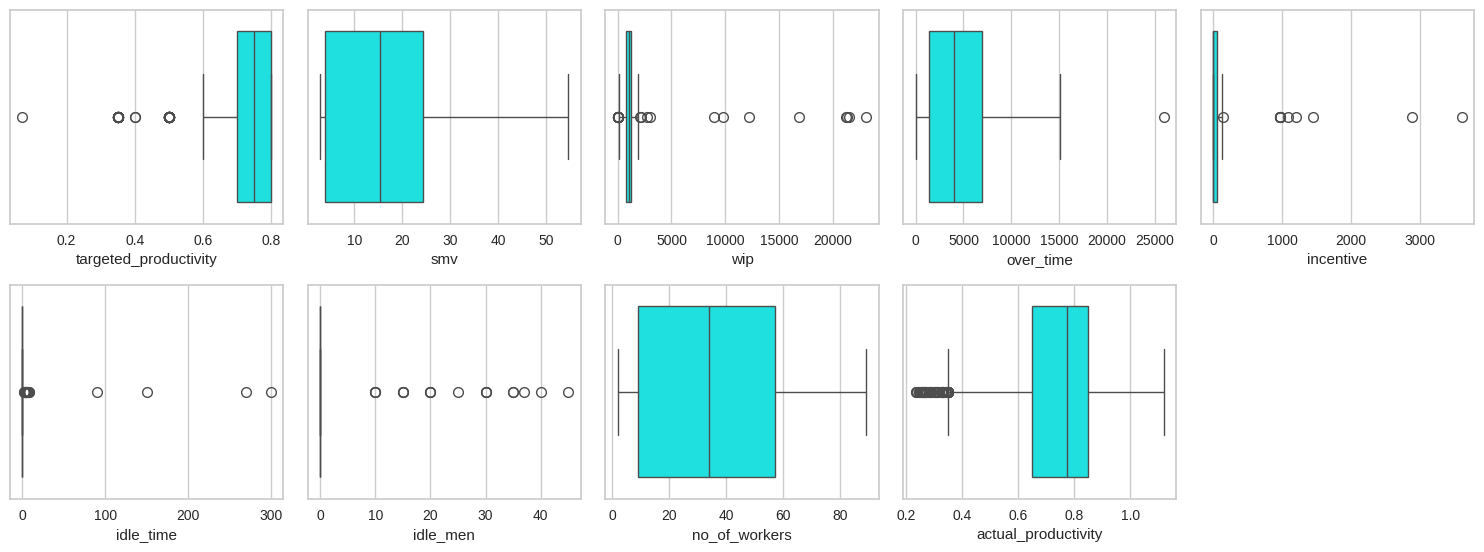

In [ ]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df[num_cols[i]], color='cyan', orient='v')
    plt.tight_layout()

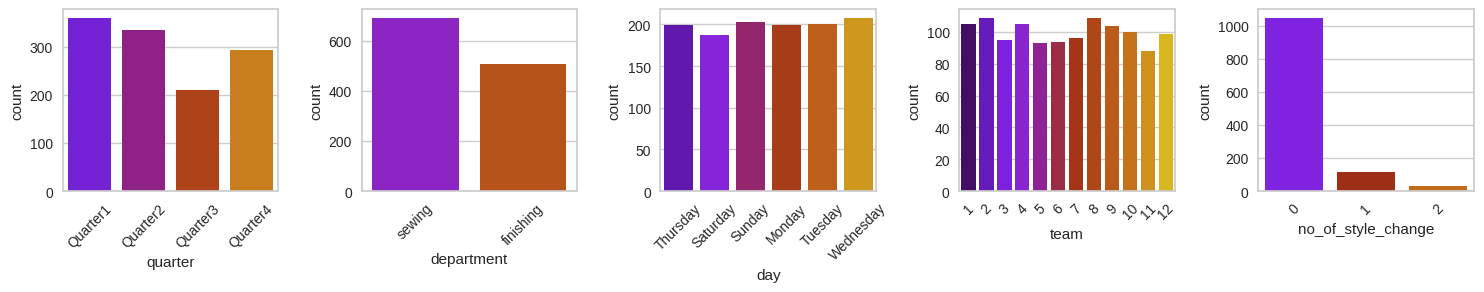

In [ ]:
plt.figure(figsize=(15,8))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=df[cat_cols[i]], data=df, palette='gnuplot')
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: >

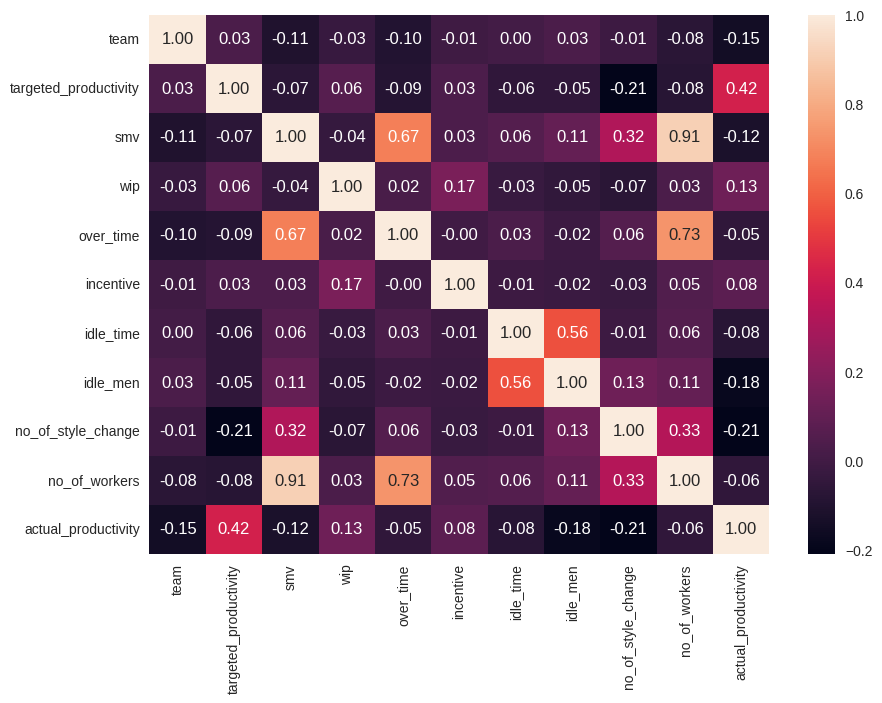

In [ ]:
# Correlation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

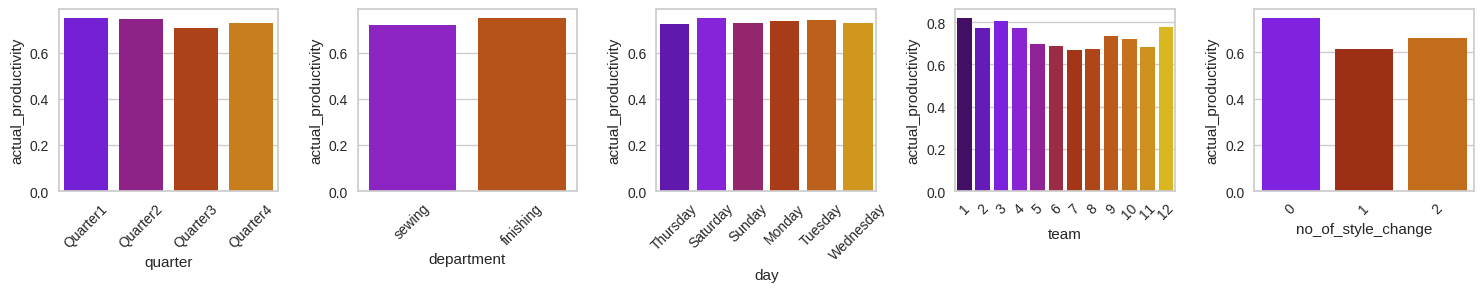

In [ ]:
plt.figure(figsize=(15,8))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.barplot(x=cat_cols[i], y='actual_productivity', data=df,palette='gnuplot',ci=None)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

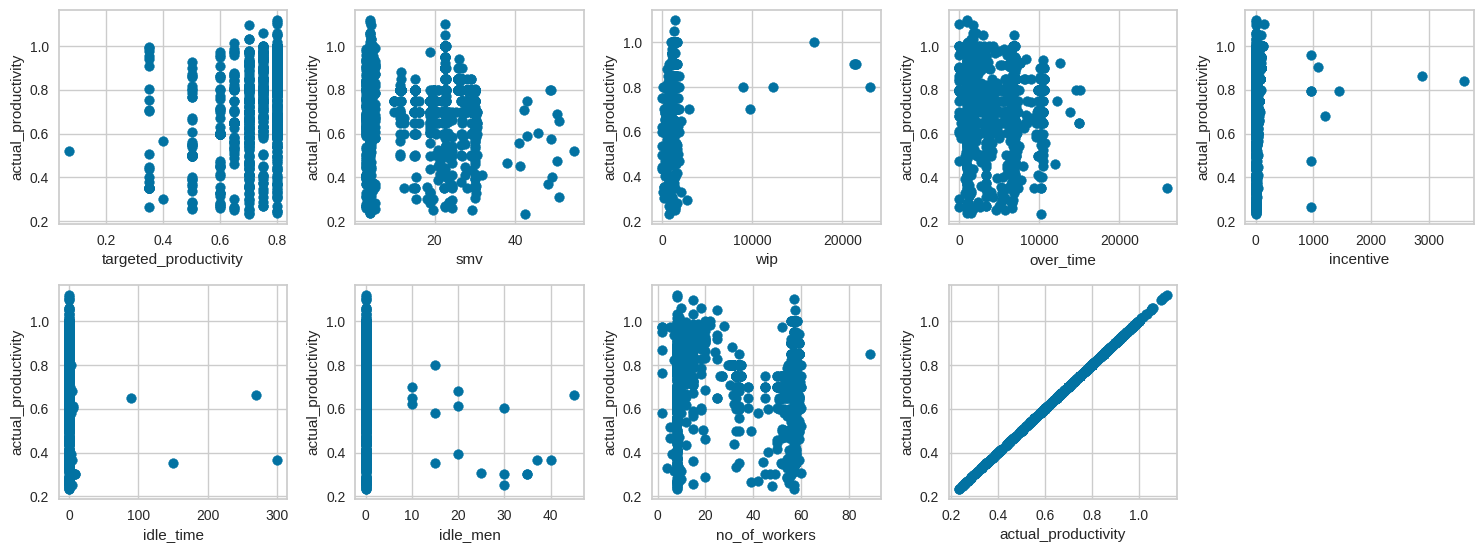

In [ ]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    plt.scatter(df[num_cols[i]], df['actual_productivity'])
    plt.xlabel(num_cols[i])
    plt.ylabel('actual_productivity')
    plt.tight_layout()

plt.show()

# Modelling and Evaluation

In [ ]:
df2 = df.copy()

In [ ]:
df2.drop(columns=['date','wip'], inplace=True)

In [ ]:
def categorize_productivity(value):
    if value <= 0.33:
        return 'Low'
    elif value <= 0.66:
        return 'Medium'
    else:
        return 'High'

# Menerapkan fungsi categorize_productivity ke kolom actual_productivity
df2['productivity_category'] = df2['actual_productivity'].apply(categorize_productivity)

df2['productivity_category']

,productivity_category
0,High
1,High
2,High
3,High
4,High
...,...
1192,Medium
1193,Medium
1194,Medium
1195,Medium


In [ ]:
le= LabelEncoder()
df2["department"] = le.fit_transform(df2["department"])
df2["quarter"] = le.fit_transform(df2["quarter"])
df2["day"] = le.fit_transform(df2["day"])
df2["productivity_category"] = le.fit_transform(df2["productivity_category"])

In [ ]:
df2['productivity_category'].value_counts()

,count
productivity_category,
0,881
2,277
1,39


In [ ]:
df2.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_category
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0


In [ ]:
X = df2.drop(columns=['productivity_category','actual_productivity'])
y = df2['productivity_category']

In [ ]:
from feature_engine.outliers import Winsorizer

# Buat Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # pilih 'iqr' untuk batas aturan IQR atau 'gaussian' untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['incentive', 'over_time'])

windsoriser.fit(X)

# Transformasikan data
X = windsoriser.transform(X)

In [ ]:
#Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.18574131,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 ,  1.0992288 ],
       [-1.18574131, -1.1685943 ,  0.27151595, ..., -0.11300466,
        -0.3516175 , -1.19926822],
       [-1.18574131,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 , -0.18522542],
       ...,
       [-0.31551915, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.19926822],
       [-0.31551915, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -0.88378824],
       [-0.31551915, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.28940536]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model KNeighbors Classifier
Cross Validation accuracy:  0.7816099476439791
Test Accuracy:  0.8041666666666667
Mean Squared Error: 0.6708333333333333
Root Mean Squared Error: 0.8190441583537076
Symmetric Mean Absolute Percentage Error: 66.17647058823529

Confusion Matrix:


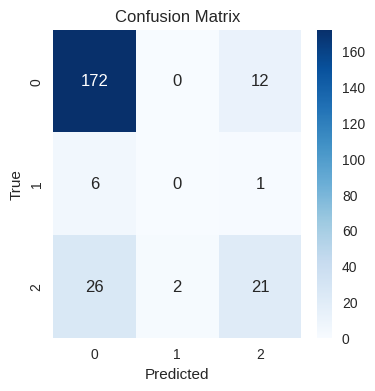


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       184
           1       0.00      0.00      0.00         7
           2       0.62      0.43      0.51        49

    accuracy                           0.80       240
   macro avg       0.49      0.45      0.46       240
weighted avg       0.77      0.80      0.78       240


Model Support Vector Machine
Cross Validation accuracy:  0.805671902268761
Test Accuracy:  0.8416666666666667
Mean Squared Error: 0.5458333333333333
Root Mean Squared Error: 0.7388053419767167
Symmetric Mean Absolute Percentage Error: 60.10928961748634

Confusion Matrix:


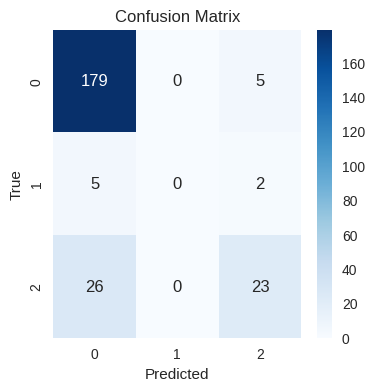


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       184
           1       0.00      0.00      0.00         7
           2       0.77      0.47      0.58        49

    accuracy                           0.84       240
   macro avg       0.54      0.48      0.50       240
weighted avg       0.81      0.84      0.82       240


Model Naive Bayes Classifier
Cross Validation accuracy:  0.6937336387434556
Test Accuracy:  0.7625
Mean Squared Error: 0.8375
Root Mean Squared Error: 0.9151502608861564
Symmetric Mean Absolute Percentage Error: 92.34972677595628

Confusion Matrix:


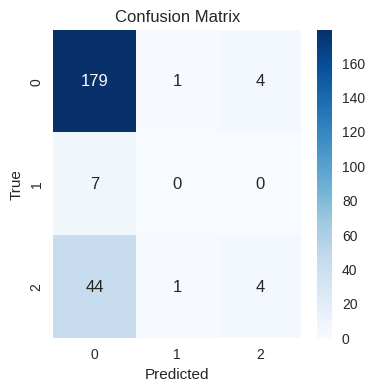


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       184
           1       0.00      0.00      0.00         7
           2       0.50      0.08      0.14        49

    accuracy                           0.76       240
   macro avg       0.43      0.35      0.34       240
weighted avg       0.70      0.76      0.69       240


Model Random Forest Classifier
Cross Validation accuracy:  0.834887652705061
Test Accuracy:  0.825
Mean Squared Error: 0.625
Root Mean Squared Error: 0.7905694150420949
Symmetric Mean Absolute Percentage Error: 54.054054054054056

Confusion Matrix:


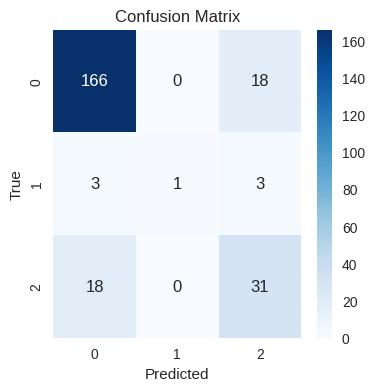


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       184
           1       1.00      0.14      0.25         7
           2       0.60      0.63      0.61        49

    accuracy                           0.82       240
   macro avg       0.83      0.56      0.59       240
weighted avg       0.83      0.82      0.82       240


Model Decision Tree Classifier
Cross Validation accuracy:  0.7753544938917976
Test Accuracy:  0.7916666666666666
Mean Squared Error: 0.7458333333333333
Root Mean Squared Error: 0.8636164272021076
Symmetric Mean Absolute Percentage Error: 57.028112449799195

Confusion Matrix:


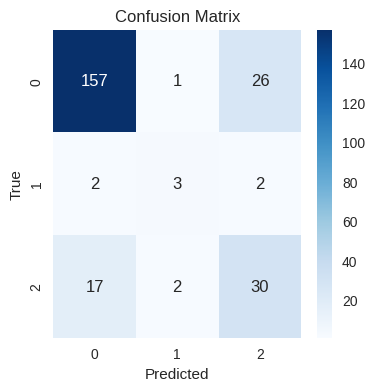


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       184
           1       0.50      0.43      0.46         7
           2       0.52      0.61      0.56        49

    accuracy                           0.79       240
   macro avg       0.64      0.63      0.63       240
weighted avg       0.80      0.79      0.80       240


Model Logistic Regression
Cross Validation accuracy:  0.7701352530541012
Test Accuracy:  0.8083333333333333
Mean Squared Error: 0.6791666666666667
Root Mean Squared Error: 0.824115687671741
Symmetric Mean Absolute Percentage Error: 64.73429951690822

Confusion Matrix:


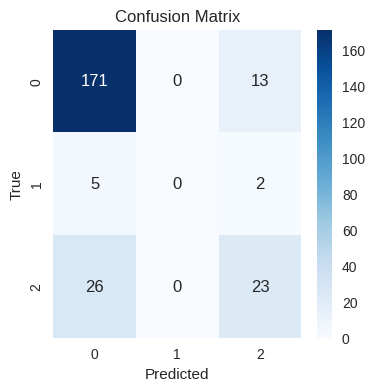


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       184
           1       0.00      0.00      0.00         7
           2       0.61      0.47      0.53        49

    accuracy                           0.81       240
   macro avg       0.48      0.47      0.47       240
weighted avg       0.77      0.81      0.79       240


Model Multilayer Perceptron
Cross Validation accuracy:  0.7993837260034904
Test Accuracy:  0.85
Mean Squared Error: 0.5125
Root Mean Squared Error: 0.7158910531638176
Symmetric Mean Absolute Percentage Error: 54.166666666666664

Confusion Matrix:


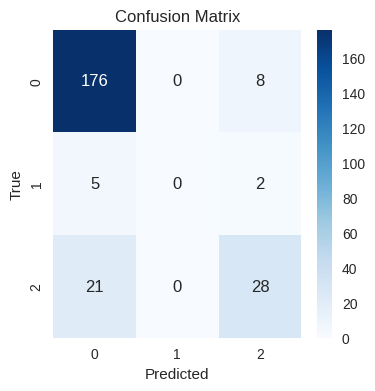


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       184
           1       0.00      0.00      0.00         7
           2       0.74      0.57      0.64        49

    accuracy                           0.85       240
   macro avg       0.54      0.51      0.52       240
weighted avg       0.82      0.85      0.83       240


Best Model:  Pipeline(steps=[('model', MLPClassifier(random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.781610       0.804167   
1    Support Vector Machine                   0.805672       0.841667   
2    Naive Bayes Classifier                   0.693734       0.762500   
3  Random Forest Classifier                   0.834888       0.825000   
4  Decision Tree Classifier                   0.775354       0.791667   
5       Logistic Regression                   0.770135       0.808333   
6     Mult

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results1 = []
initial_rmse = {}
initial_smape = {}



models = [
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)
    initial_rmse[name] = rmse

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100
    initial_smape[name] = smape

    results1.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# Retrieve the best model
print("Best Model: ", best_model)

df_results1 = pd.DataFrame(results1, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results1)

In [ ]:
def hyperparameter_tuning(X, y, models):
    # Define dictionary to store results
    results = {}

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
        if model_name == 'KNN':
          param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
          param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
          param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Random Forest':
          param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
        elif model_name == 'Decision Tree':
          param_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Logistic Regression':
          param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'Multilayer Perceptron':
          param_grid = {'hidden_layer_sizes': [(100,), (50, 50), (100, 100)], 'activation': ['relu', 'tanh']}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

In [ ]:
# Define models dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Multilayer Perceptron": MLPClassifier()
}

# Example usage:
results = hyperparameter_tuning(X_train, y_train, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()

Model: KNN
Best hyperparameters: {'n_neighbors': 7}
Accuracy: 0.8333333333333334

Model: SVM
Best hyperparameters: {'C': 1, 'gamma': 0.1}
Accuracy: 0.8458333333333333

Model: NB
Best hyperparameters: {'var_smoothing': 1e-06}
Accuracy: 0.7625

Model: Random Forest
Best hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.8375

Model: Decision Tree
Best hyperparameters: {'max_depth': 30, 'min_samples_split': 10}
Accuracy: 0.7958333333333333

Model: Logistic Regression
Best hyperparameters: {'C': 0.1}
Accuracy: 0.8

Model: Multilayer Perceptron
Best hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,)}
Accuracy: 0.8625



Model KNeighbors Classifier
Cross Validation accuracy:  0.7795266143106457
Test Accuracy:  0.8291666666666667
Mean Squared Error: 0.5708333333333333
Root Mean Squared Error: 0.7555351304428758
Symmetric Mean Absolute Percentage Error: 61.979166666666664

Confusion Matrix:


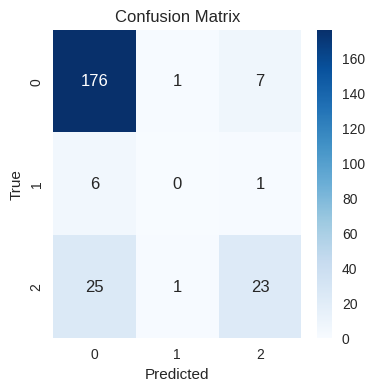


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       184
           1       0.00      0.00      0.00         7
           2       0.74      0.47      0.58        49

    accuracy                           0.83       240
   macro avg       0.53      0.48      0.49       240
weighted avg       0.80      0.83      0.81       240


Model Support Vector Machine
Cross Validation accuracy:  0.8035776614310646
Test Accuracy:  0.8458333333333333
Mean Squared Error: 0.5291666666666667
Root Mean Squared Error: 0.7274384280931732
Symmetric Mean Absolute Percentage Error: 58.46994535519126

Confusion Matrix:


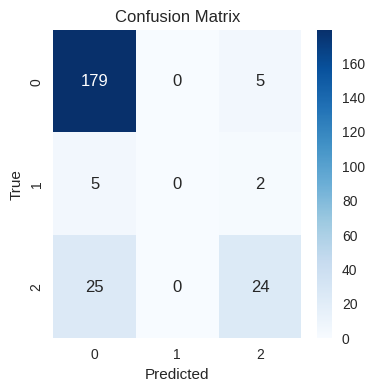


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       184
           1       0.00      0.00      0.00         7
           2       0.77      0.49      0.60        49

    accuracy                           0.85       240
   macro avg       0.54      0.49      0.50       240
weighted avg       0.81      0.85      0.82       240


Model Naive Bayes Classifier
Cross Validation accuracy:  0.7377126963350784
Test Accuracy:  0.7625
Mean Squared Error: 0.8375
Root Mean Squared Error: 0.9151502608861564
Symmetric Mean Absolute Percentage Error: 92.34972677595628

Confusion Matrix:


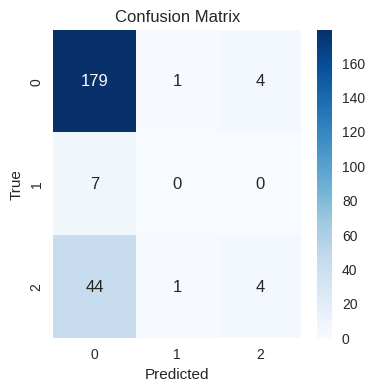


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       184
           1       0.00      0.00      0.00         7
           2       0.50      0.08      0.14        49

    accuracy                           0.76       240
   macro avg       0.43      0.35      0.34       240
weighted avg       0.70      0.76      0.69       240


Model Random Forest Classifier
Cross Validation accuracy:  0.8286540139616054
Test Accuracy:  0.8416666666666667
Mean Squared Error: 0.5583333333333333
Root Mean Squared Error: 0.7472170590486632
Symmetric Mean Absolute Percentage Error: 50.70422535211267

Confusion Matrix:


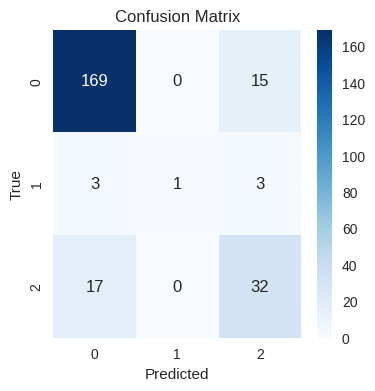


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       184
           1       1.00      0.14      0.25         7
           2       0.64      0.65      0.65        49

    accuracy                           0.84       240
   macro avg       0.84      0.57      0.60       240
weighted avg       0.85      0.84      0.83       240


Model Decision Tree Classifier
Cross Validation accuracy:  0.7900196335078535
Test Accuracy:  0.7958333333333333
Mean Squared Error: 0.7166666666666667
Root Mean Squared Error: 0.8465616732800196
Symmetric Mean Absolute Percentage Error: 59.307359307359306

Confusion Matrix:


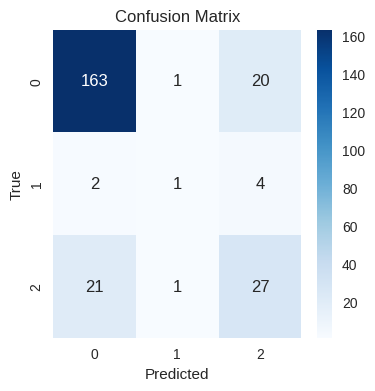


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       184
           1       0.33      0.14      0.20         7
           2       0.53      0.55      0.54        49

    accuracy                           0.80       240
   macro avg       0.58      0.53      0.54       240
weighted avg       0.79      0.80      0.79       240


Model Logistic Regression
Cross Validation accuracy:  0.7732657068062828
Test Accuracy:  0.8166666666666667
Mean Squared Error: 0.6458333333333334
Root Mean Squared Error: 0.8036375634160796
Symmetric Mean Absolute Percentage Error: 61.835748792270536

Confusion Matrix:


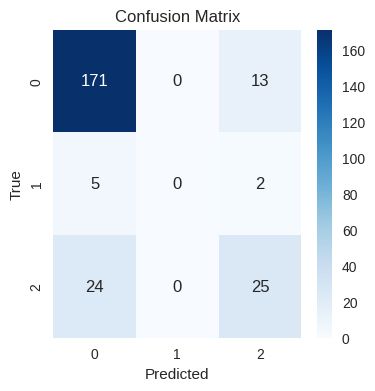


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       184
           1       0.00      0.00      0.00         7
           2       0.62      0.51      0.56        49

    accuracy                           0.82       240
   macro avg       0.49      0.48      0.48       240
weighted avg       0.78      0.82      0.80       240


Model Multilayer Perceptron
Cross Validation accuracy:  0.799378272251309
Test Accuracy:  0.85
Mean Squared Error: 0.5125
Root Mean Squared Error: 0.7158910531638176
Symmetric Mean Absolute Percentage Error: 55.026455026455025

Confusion Matrix:


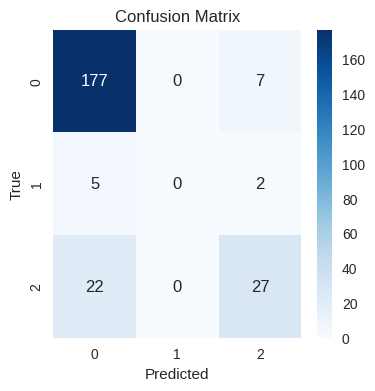


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       184
           1       0.00      0.00      0.00         7
           2       0.75      0.55      0.64        49

    accuracy                           0.85       240
   macro avg       0.54      0.50      0.52       240
weighted avg       0.82      0.85      0.83       240


Best Model:  Pipeline(steps=[('model', MLPClassifier(activation='tanh', random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.779527       0.829167   
1    Support Vector Machine                   0.803578       0.845833   
2    Naive Bayes Classifier                   0.737713       0.762500   
3  Random Forest Classifier                   0.828654       0.841667   
4  Decision Tree Classifier                   0.790020       0.795833   
5       Logistic Regression                   0.773266       0.8

In [ ]:
results2 = []

models = [
    ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=9)),
    ('Support Vector Machine', SVC(random_state=42,C=1,gamma=0.1)),
    ('Naive Bayes Classifier', GaussianNB(var_smoothing=1e-06)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42,max_depth=10,n_estimators=100)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=10)),
    ('Logistic Regression', LogisticRegression(random_state=42,C=100)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42,activation='tanh',hidden_layer_sizes=(100,)))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

     #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100

    results2.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = pipeline



# Retrieve the best model
print("Best Model: ", best_model)

df_results2 = pd.DataFrame(results2, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results2)

In [ ]:
df2.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_category
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0


In [ ]:
from imblearn.over_sampling import SMOTE
print("Sebelum SMOTE: ",y.value_counts())
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("Setelah SMOTE: ",y_smote.value_counts())

Sebelum SMOTE:  productivity_category
0    881
2    277
1     39
Name: count, dtype: int64
Setelah SMOTE:  productivity_category
0    881
2    881
1    881
Name: count, dtype: int64


In [ ]:
X_smote = scaler.fit_transform(X_smote)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

Model KNeighbors Classifier
Cross Validation accuracy:  0.846735683954601
Test Accuracy:  0.8733459357277883
Mean Squared Error: 0.3705103969754253
Root Mean Squared Error: 0.6086956521739131
Symmetric Mean Absolute Percentage Error: 14.86146095717884

Confusion Matrix:


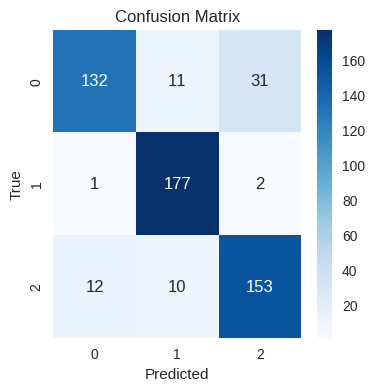


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       174
           1       0.89      0.98      0.94       180
           2       0.82      0.87      0.85       175

    accuracy                           0.87       529
   macro avg       0.88      0.87      0.87       529
weighted avg       0.88      0.87      0.87       529


Model Support Vector Machine
Cross Validation accuracy:  0.8017960180610176
Test Accuracy:  0.7939508506616257
Mean Squared Error: 0.43856332703213613
Root Mean Squared Error: 0.6622411396403398
Symmetric Mean Absolute Percentage Error: 19.272125723738625

Confusion Matrix:


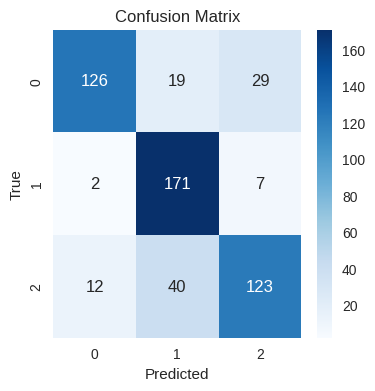


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       174
           1       0.74      0.95      0.83       180
           2       0.77      0.70      0.74       175

    accuracy                           0.79       529
   macro avg       0.81      0.79      0.79       529
weighted avg       0.80      0.79      0.79       529


Model Naive Bayes Classifier
Cross Validation accuracy:  0.5704962298186056
Test Accuracy:  0.5916824196597353
Mean Squared Error: 0.6408317580340265
Root Mean Squared Error: 0.800519679979216
Symmetric Mean Absolute Percentage Error: 35.08771929824561

Confusion Matrix:


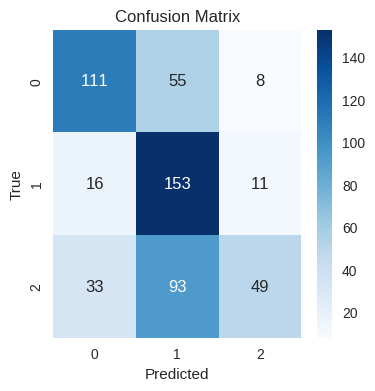


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       174
           1       0.51      0.85      0.64       180
           2       0.72      0.28      0.40       175

    accuracy                           0.59       529
   macro avg       0.64      0.59      0.57       529
weighted avg       0.64      0.59      0.57       529


Model Random Forest Classifier
Cross Validation accuracy:  0.9110685355114112
Test Accuracy:  0.9111531190926276
Mean Squared Error: 0.30434782608695654
Root Mean Squared Error: 0.5516772843673705
Symmetric Mean Absolute Percentage Error: 11.258865248226952

Confusion Matrix:


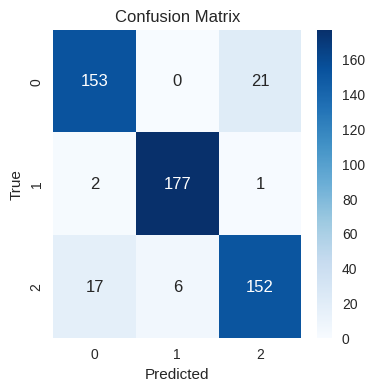


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       174
           1       0.97      0.98      0.98       180
           2       0.87      0.87      0.87       175

    accuracy                           0.91       529
   macro avg       0.91      0.91      0.91       529
weighted avg       0.91      0.91      0.91       529


Model Decision Tree Classifier
Cross Validation accuracy:  0.84248372603722
Test Accuracy:  0.8506616257088847
Mean Squared Error: 0.4158790170132325
Root Mean Squared Error: 0.6448868249648403
Symmetric Mean Absolute Percentage Error: 17.935258092738408

Confusion Matrix:


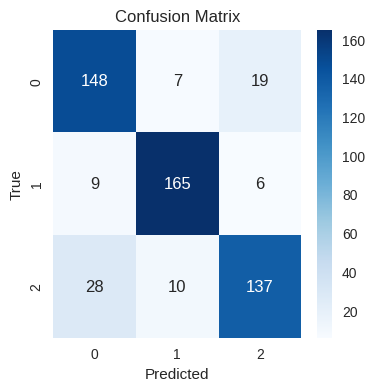


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       174
           1       0.91      0.92      0.91       180
           2       0.85      0.78      0.81       175

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529


Model Logistic Regression
Cross Validation accuracy:  0.6665098091940888
Test Accuracy:  0.665406427221172
Mean Squared Error: 0.6068052930056711
Root Mean Squared Error: 0.7789770811812573
Symmetric Mean Absolute Percentage Error: 29.916666666666664

Confusion Matrix:


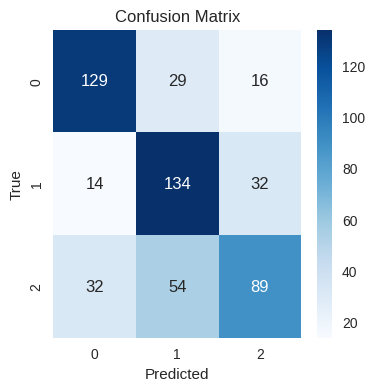


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       174
           1       0.62      0.74      0.68       180
           2       0.65      0.51      0.57       175

    accuracy                           0.67       529
   macro avg       0.67      0.66      0.66       529
weighted avg       0.67      0.67      0.66       529


Model Multilayer Perceptron
Cross Validation accuracy:  0.8386821731482416
Test Accuracy:  0.8487712665406427
Mean Squared Error: 0.41776937618147447
Root Mean Squared Error: 0.6463508151008046
Symmetric Mean Absolute Percentage Error: 16.75041876046901

Confusion Matrix:


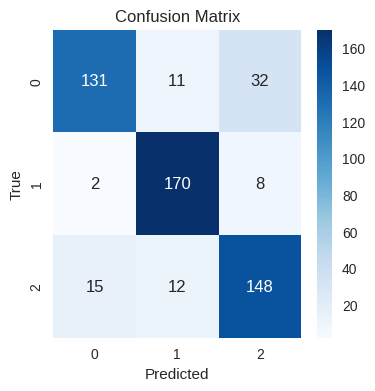


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       174
           1       0.88      0.94      0.91       180
           2       0.79      0.85      0.82       175

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529


Best Model:  Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.846736       0.873346   
1    Support Vector Machine                   0.801796       0.793951   
2    Naive Bayes Classifier                   0.570496       0.591682   
3  Random Forest Classifier                   0.911069       0.911153   
4  Decision Tree Classifier                   0.842484       0.850662   
5       Logistic Regression                   0.666510       0.665406   
6

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results3 = []

models = [
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100

    results3.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# Retrieve the best model
print("Best Model: ", best_model)

df_results3 = pd.DataFrame(results3, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results3)

In [ ]:
def hyperparameter_tuning(X, y, models):
    # Define dictionary to store results
    results = {}

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
        if model_name == 'KNN':
          param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
          param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
          param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Random Forest':
          param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
        elif model_name == 'Decision Tree':
          param_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Logistic Regression':
          param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'Multilayer Perceptron':
          param_grid = {'hidden_layer_sizes': [(100,), (50, 50), (100, 100)], 'activation': ['relu', 'tanh']}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

In [ ]:
# Define models dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Multilayer Perceptron": MLPClassifier()
}

# Example usage:
results = hyperparameter_tuning(X_train, y_train, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()

Model: KNN
Best hyperparameters: {'n_neighbors': 3}
Accuracy: 0.8771266540642723

Model: SVM
Best hyperparameters: {'C': 100, 'gamma': 1}
Accuracy: 0.9300567107750473

Model: NB
Best hyperparameters: {'var_smoothing': 1e-09}
Accuracy: 0.5916824196597353

Model: Random Forest
Best hyperparameters: {'max_depth': 30, 'n_estimators': 100}
Accuracy: 0.9168241965973535

Model: Decision Tree
Best hyperparameters: {'max_depth': 30, 'min_samples_split': 2}
Accuracy: 0.8638941398865785

Model: Logistic Regression
Best hyperparameters: {'C': 0.1}
Accuracy: 0.6616257088846881

Model: Multilayer Perceptron
Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100)}
Accuracy: 0.8903591682419659



Model KNeighbors Classifier
Cross Validation accuracy:  0.8595106046855567
Test Accuracy:  0.8771266540642723
Mean Squared Error: 0.3553875236294896
Root Mean Squared Error: 0.596143878295743
Symmetric Mean Absolute Percentage Error: 14.334181509754027

Confusion Matrix:


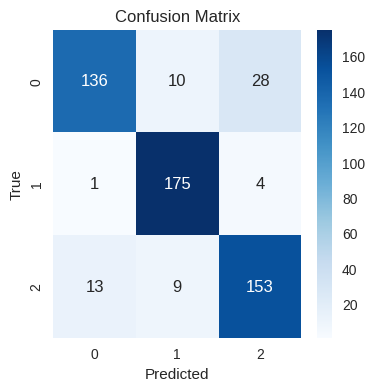


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       174
           1       0.90      0.97      0.94       180
           2       0.83      0.87      0.85       175

    accuracy                           0.88       529
   macro avg       0.88      0.88      0.88       529
weighted avg       0.88      0.88      0.88       529


Model Support Vector Machine
Cross Validation accuracy:  0.8997232586019518
Test Accuracy:  0.9300567107750473
Mean Squared Error: 0.24007561436672967
Root Mean Squared Error: 0.4899751160688976
Symmetric Mean Absolute Percentage Error: 9.68586387434555

Confusion Matrix:


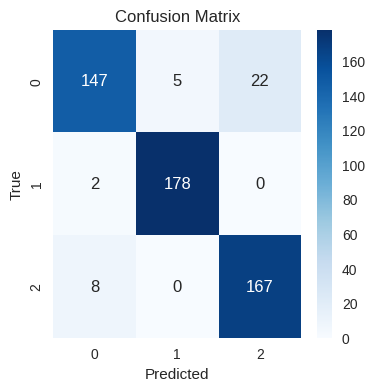


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       174
           1       0.97      0.99      0.98       180
           2       0.88      0.95      0.92       175

    accuracy                           0.93       529
   macro avg       0.93      0.93      0.93       529
weighted avg       0.93      0.93      0.93       529


Model Naive Bayes Classifier
Cross Validation accuracy:  0.5704962298186056
Test Accuracy:  0.5916824196597353
Mean Squared Error: 0.6408317580340265
Root Mean Squared Error: 0.800519679979216
Symmetric Mean Absolute Percentage Error: 35.08771929824561

Confusion Matrix:


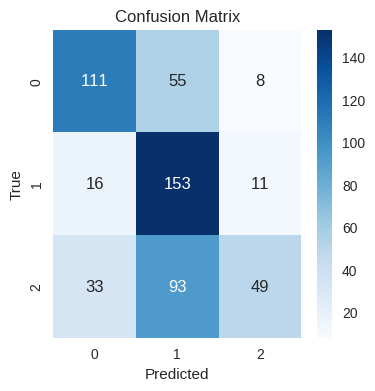


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       174
           1       0.51      0.85      0.64       180
           2       0.72      0.28      0.40       175

    accuracy                           0.59       529
   macro avg       0.64      0.59      0.57       529
weighted avg       0.64      0.59      0.57       529


Model Random Forest Classifier
Cross Validation accuracy:  0.9120108007573975
Test Accuracy:  0.9243856332703214
Mean Squared Error: 0.2627599243856333
Root Mean Squared Error: 0.5126011357631128
Symmetric Mean Absolute Percentage Error: 9.856630824372761

Confusion Matrix:


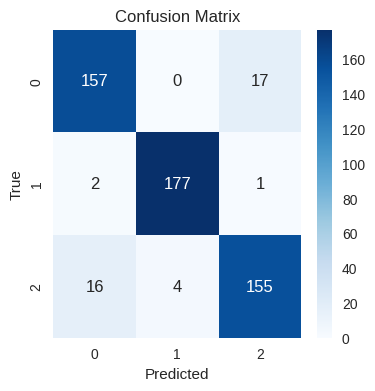


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       174
           1       0.98      0.98      0.98       180
           2       0.90      0.89      0.89       175

    accuracy                           0.92       529
   macro avg       0.92      0.92      0.92       529
weighted avg       0.92      0.92      0.92       529


Model Decision Tree Classifier
Cross Validation accuracy:  0.84248372603722
Test Accuracy:  0.8506616257088847
Mean Squared Error: 0.4158790170132325
Root Mean Squared Error: 0.6448868249648403
Symmetric Mean Absolute Percentage Error: 17.935258092738408

Confusion Matrix:


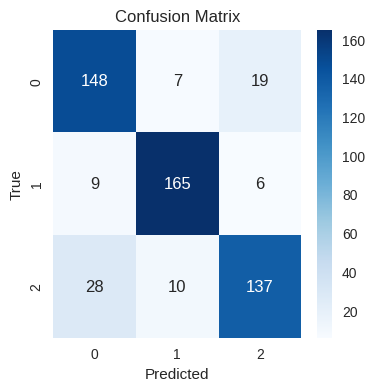


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       174
           1       0.91      0.92      0.91       180
           2       0.85      0.78      0.81       175

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529


Model Logistic Regression
Cross Validation accuracy:  0.6712379415817955
Test Accuracy:  0.6616257088846881
Mean Squared Error: 0.6275992438563327
Root Mean Squared Error: 0.7922116155777651
Symmetric Mean Absolute Percentage Error: 30.583333333333336

Confusion Matrix:


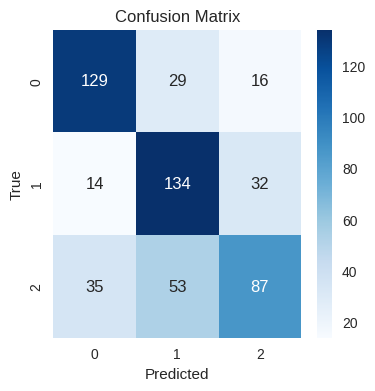


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       174
           1       0.62      0.74      0.68       180
           2       0.64      0.50      0.56       175

    accuracy                           0.66       529
   macro avg       0.66      0.66      0.66       529
weighted avg       0.66      0.66      0.66       529


Model Multilayer Perceptron
Cross Validation accuracy:  0.895455614937313
Test Accuracy:  0.9035916824196597
Mean Squared Error: 0.31758034026465026
Root Mean Squared Error: 0.5635426694267704
Symmetric Mean Absolute Percentage Error: 12.348877374784111

Confusion Matrix:


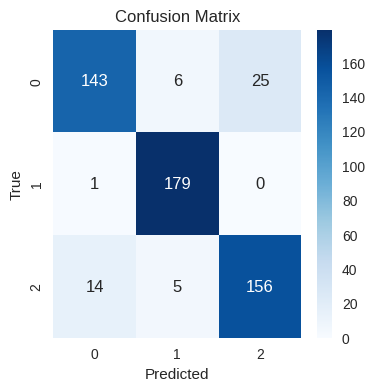


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       174
           1       0.94      0.99      0.97       180
           2       0.86      0.89      0.88       175

    accuracy                           0.90       529
   macro avg       0.90      0.90      0.90       529
weighted avg       0.90      0.90      0.90       529


Best Model:  Pipeline(steps=[('model', SVC(C=100, gamma=1, random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.859511       0.877127   
1    Support Vector Machine                   0.899723       0.930057   
2    Naive Bayes Classifier                   0.570496       0.591682   
3  Random Forest Classifier                   0.912011       0.924386   
4  Decision Tree Classifier                   0.842484       0.850662   
5       Logistic Regression                   0.671238       0.661626   
6   

In [ ]:
final_rmse = {}
final_smape = {}
results4 = []

models = [
    ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=3)),
    ('Support Vector Machine', SVC(random_state=42,C=100,gamma=1)),
    ('Naive Bayes Classifier', GaussianNB(var_smoothing=1e-09)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42,max_depth=30,n_estimators=300)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42,max_depth=30,min_samples_split=2)),
    ('Logistic Regression', LogisticRegression(random_state=42,C=0.1)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42,activation='relu',hidden_layer_sizes=(100,100)))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

     #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)
    final_rmse[name] = rmse

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100
    final_smape[name] = smape

    results4.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = pipeline

print("Best Model: ", best_model)

df_results4 = pd.DataFrame(results4, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results4)

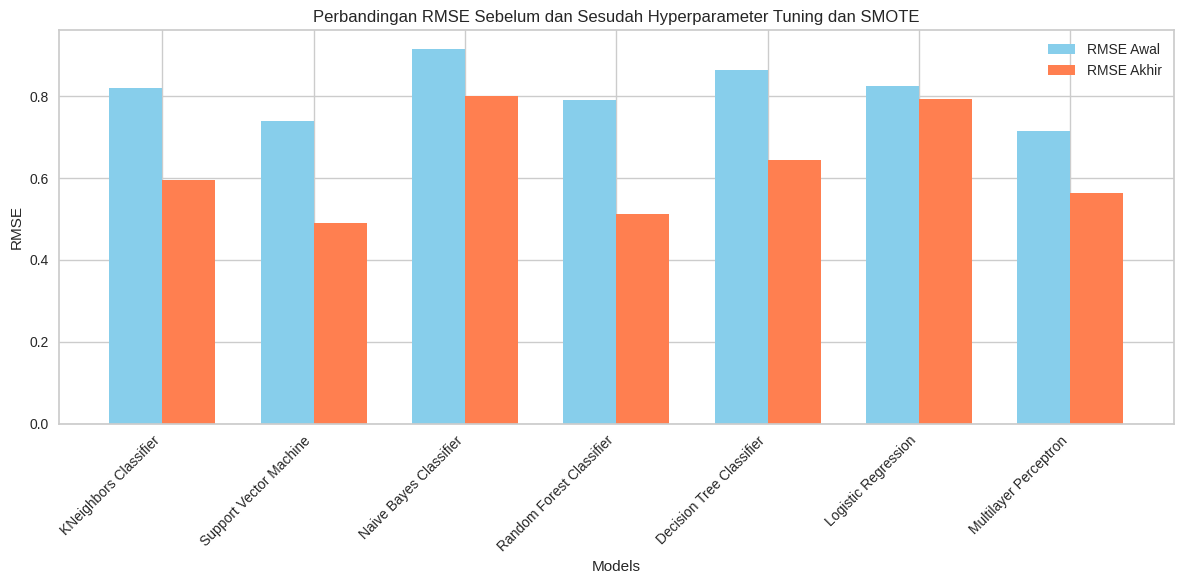

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(initial_rmse.keys())

initial_rmse_values = list(initial_rmse.values())
final_rmse_values = list(final_rmse.values())

bar_width = 0.35

index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))
plt.bar(index, initial_rmse_values, bar_width, label='RMSE Awal', color='skyblue')
plt.bar(index + bar_width, final_rmse_values, bar_width, label='RMSE Akhir', color='coral')

plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Perbandingan RMSE Sebelum dan Sesudah Hyperparameter Tuning dan SMOTE")
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

plt.show()

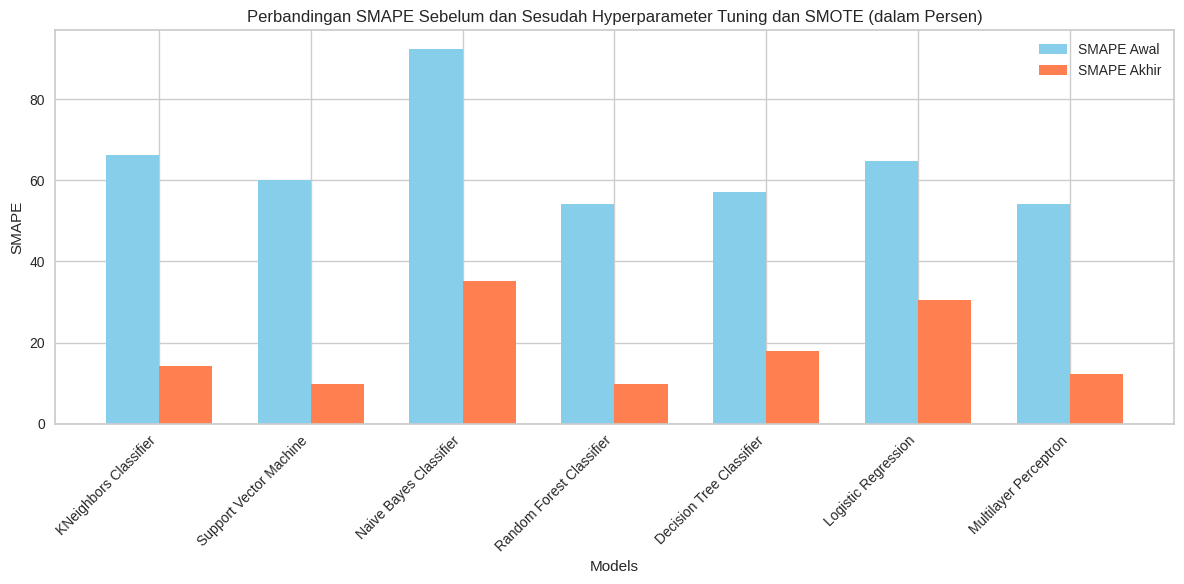

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(initial_smape.keys())

initial_smape_values = list(initial_smape.values())
final_smape_values = list(final_smape.values())

bar_width = 0.35

index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))
plt.bar(index, initial_smape_values, bar_width, label='SMAPE Awal', color='skyblue')
plt.bar(index + bar_width, final_smape_values, bar_width, label='SMAPE Akhir', color='coral')

plt.xlabel("Models")
plt.ylabel("SMAPE")
plt.title("Perbandingan SMAPE Sebelum dan Sesudah Hyperparameter Tuning dan SMOTE (dalam Persen)")
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

plt.show()

Text(0, 0.5, 'Features')

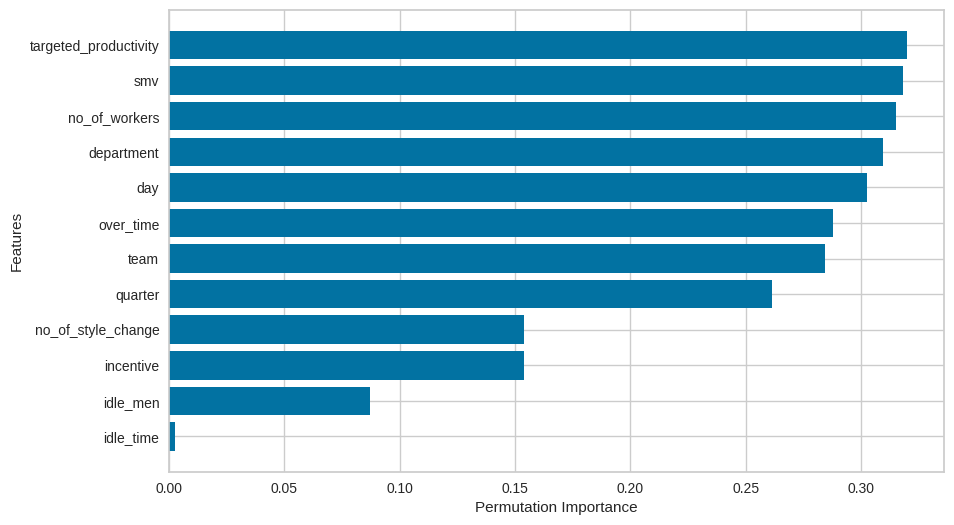

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

feature_names = df2.drop(columns=['productivity_category','actual_productivity']).columns
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")

## Save Model

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
with open('best_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

new_data = pd.read_csv('/content/drive/MyDrive/Cakap DS/garments_new.csv')
new_data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,500.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/2/2015,Quarter1,sewing,Friday,8,0.85,27.00,1120.0,7200,110,0.0,0,1,60.0,0.950000
6,1/2/2015,Quarter1,finishing,Friday,2,0.78,4.10,600.0,950,0,0.0,0,0,9.0,0.875000
7,1/2/2015,Quarter1,sewing,Friday,10,0.83,12.00,970.0,3700,55,0.0,0,0,32.0,0.820000
8,1/2/2015,Quarter1,sewing,Friday,14,0.79,11.50,965.0,3600,45,0.0,0,0,31.5,0.810000
9,1/2/2015,Quarter1,sewing,Friday,7,0.81,26.00,1165.0,1900,48,0.0,0,0,57.0,0.805000


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   20 non-null     object 
 1   quarter                20 non-null     object 
 2   department             20 non-null     object 
 3   day                    20 non-null     object 
 4   team                   20 non-null     int64  
 5   targeted_productivity  20 non-null     float64
 6   smv                    20 non-null     float64
 7   wip                    20 non-null     float64
 8   over_time              20 non-null     int64  
 9   incentive              20 non-null     int64  
 10  idle_time              20 non-null     float64
 11  idle_men               20 non-null     int64  
 12  no_of_style_change     20 non-null     int64  
 13  no_of_workers          20 non-null     float64
 14  actual_productivity    20 non-null     float64
dtypes: float

In [ ]:
new_data.drop(columns=['date','wip'], inplace=True)

In [ ]:
new_data['productivity_category'] = new_data['actual_productivity'].apply(categorize_productivity)


In [ ]:
le= LabelEncoder()
new_data["department"] = le.fit_transform(new_data["department"])
new_data["quarter"] = le.fit_transform(new_data["quarter"])
new_data["day"] = le.fit_transform(new_data["day"])
new_data["productivity_category"] = le.fit_transform(new_data["productivity_category"])

In [ ]:
X_new = new_data.drop(columns=['actual_productivity','productivity_category'])
y_new = new_data['actual_productivity']

In [ ]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

In [ ]:
predictions = saved_model.predict(X_new)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
